Multi-class classification with SVM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score

In [2]:
df = pd.read_csv('drug200.csv')

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
#converting categorical variables

# this will transform multi-class worded variables into numerical groups (0, 1, 2, etc.)
s=df.dtypes=='object'
object_cols=list(s[s].index)
print(object_cols)

encoder=LabelEncoder()
for cols in object_cols:
    df[cols]=encoder.fit_transform(df[cols]) 

['Sex', 'BP', 'Cholesterol', 'Drug']


In [5]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [6]:
y = df['Drug']
X = df.drop(['Drug'], axis = 1, inplace = False)


X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.4)
svclassifier = svm.SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[38  0  1  0  0]
 [ 0 10  0  0  0]
 [ 0  0  8  0  0]
 [ 0  0  0  8  0]
 [ 0  0  0  0 15]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        39
           1       1.00      1.00      1.00        10
           2       0.89      1.00      0.94         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        15

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [7]:
df = pd.read_csv('wine_data.csv')
y = df['1']

In [22]:
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [8]:
X = df.drop(['1'], axis = 1, inplace = False)
X_num = X.to_numpy()


In [9]:
scaler = StandardScaler().fit(X_num)
X_scaled = scaler.transform(X_num)

In [10]:
y_num = y.to_numpy()
y_num

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3])

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X_num, y_num, random_state=45, test_size=0.3)
svclassifier = svm.SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[15  2  0]
 [ 2 16  0]
 [ 3 16  0]]
              precision    recall  f1-score   support

           1       0.75      0.88      0.81        17
           2       0.47      0.89      0.62        18
           3       0.00      0.00      0.00        19

    accuracy                           0.57        54
   macro avg       0.41      0.59      0.48        54
weighted avg       0.39      0.57      0.46        54

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

In [12]:
X_train[svr.support_, 1]

NameError: name 'svr' is not defined

In [16]:
svr = svm.SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
#print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,y_pred))

In [21]:
y_train[:54, ]

array([1, 2, 3, 1, 3, 2, 2, 1, 2, 3, 3, 1, 1, 1, 2, 3, 3, 1, 3, 1, 3, 1,
       2, 2, 2, 1, 3, 1, 1, 3, 1, 3, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2,
       1, 2, 3, 2, 3, 3, 3, 2, 2, 2])

KeyError: "None of [Int64Index([  6,  20,  24,  31,  35,  37,  42,  44,  47,  53,  56,  58,  61,\n             68,  72,  94,  97, 100, 122, 123, 124, 125, 126, 127, 128, 129,\n            130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,\n            143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,\n            156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,\n            169, 170, 171, 172, 173, 174, 175, 176],\n           dtype='int64')] are in the [columns]"

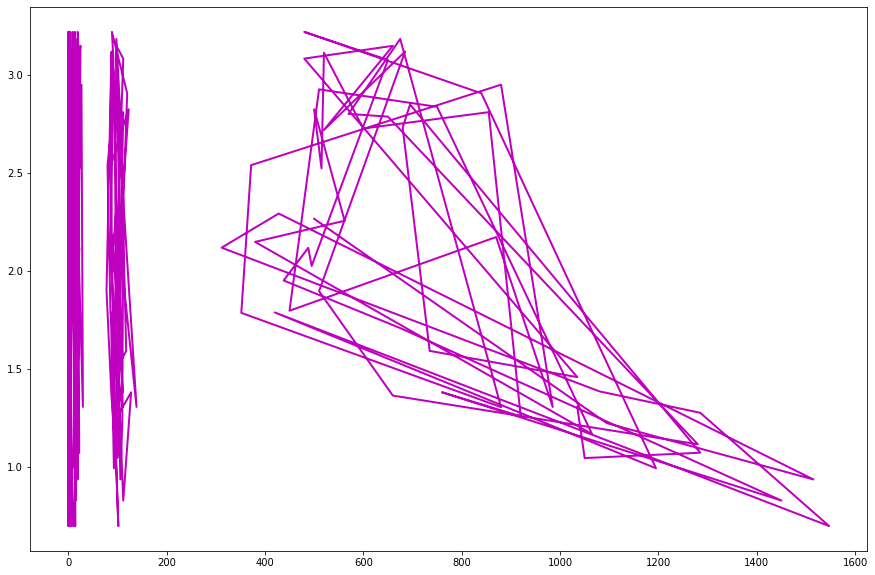

In [15]:
lw = 2

#svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']


fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 10), sharey=True)
ix = 0
axes.plot(X_test, svr.fit(X_train, y_train).predict(X_test), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
axes.scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
axes.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=18cf4704-3790-49a3-8d94-41dc8f485b71' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>